<h1><center>ALURA CASH</center></h1>

**Importando base de dados**

In [1]:
import pandas as pd

dados = pd.read_csv('data/analise_de_risco.csv', sep=';')

dados.head()

,id_pessoa,idade_pessoa,salario_ano_pessoa,propriedade_pessoa,anos_trabalhados_pessoa,id_emprestimo,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,id_historico,verifica_inadimplencia,tempo_primeira_solicitacao
0,F9a6bBd9-Xe2o,27,68000,Aluguel,4.0,8HuvzhAq-k7Xi,Melhora_do_lar,A,8700,7.88,0,0.13,L42AQtMx-SEGR,N,5
1,RSQpYv0W-D6Oo,24,12600,Aluguel,2.0,PDpdl2hQ-Sszr,Empreendimento,C,2500,13.11,1,0.20,oZ2iPvfD-HdIo,Y,2
2,bRYeof0L-cqHI,30,100000,Aluguel,13.0,0T2YFLWb-IZze,Pagamento_debitos,A,12000,7.88,0,0.12,0Y1a64ag-4RLW,N,9
3,d0YRlkdZ-nuLT,28,83000,Hipoteca,6.0,xzTEiD3e-BbFZ,Pagamento_debitos,B,5000,0.00,0,0.06,Z5LA433k-5vqf,N,9
4,njGBnugm-85Dv,30,110400,Aluguel,1.0,QKDlpIm7-sqMC,Empreendimento,D,14000,16.89,1,0.13,ObEkaKZr-9MDa,N,6


### 1. Remoção de Dados Nulos

Existem várias formas de tratar os dados nulos, entre elas estão:
    
> Deletar todas as linhas que possuem registros nulos com dropna();

> Utilizar a técnica fillna() para substituir os dados nulos por um valor específico que desejamos.

Uma técnica bastante utilizada para tratamento de dados nulos é substitui-los pela média ou mediana de uma determinada coluna.

Vou primeiro verificar a quantidade de valores nulos por coluna:

In [2]:
dados.isnull().sum()

id_pessoa                          0
idade_pessoa                       0
salario_ano_pessoa                 0
propriedade_pessoa               331
anos_trabalhados_pessoa            0
id_emprestimo                      0
motivo_emprestimo                311
pontuacao_emprestimo             309
valor_emprestimo                   0
taxa_juros_emprestimo              0
status_inadimplencia               0
percentual_emprestimo_salario      0
id_historico                       0
verifica_inadimplencia           366
tempo_primeira_solicitacao         0
dtype: int64

Como as colunas que possuem dados faltantes são todas categóricas, não faz sentido tirar a média ou a mediana delas e nem substituir por outro valor. Então eu optei por apenas excluir esses registros:

In [3]:
dados = dados.dropna(axis = 0)

Checando novamente os valores nulos: 

In [4]:
dados.isnull().sum()

id_pessoa                        0
idade_pessoa                     0
salario_ano_pessoa               0
propriedade_pessoa               0
anos_trabalhados_pessoa          0
id_emprestimo                    0
motivo_emprestimo                0
pontuacao_emprestimo             0
valor_emprestimo                 0
taxa_juros_emprestimo            0
status_inadimplencia             0
percentual_emprestimo_salario    0
id_historico                     0
verifica_inadimplencia           0
tempo_primeira_solicitacao       0
dtype: int64

### 2. Tratamento de Outliers

Nessa etapa iremos utilizar muito o .describe() que é basicamente o resumo trazendo a média, desvio padrão, valores minímos e máximos, quartis e a quantidade de dados, claro que essa função irá ignorar outras variáveis categóricas, mas no momento queremos tratar os outliers das colunas numéricas.

Paralelo a esse comando muito útil do python, iremos utilizar gráficos do tipo BoxPlot do matplotlib para facilitar a visualização de possíveis outliers em nossas amostras.



**O que é o BoxPlot ?**

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='50%'>

Vamos começar vendo a descrição dos dados:

In [5]:
dados.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,33360.000000,3.336000e+04,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000
mean,27.561721,6.564681e+04,4.628567,9529.754197,9.893280,0.216457,0.169135,5.807374
std,6.698419,6.174520e+04,4.159946,6348.596166,4.523957,0.411835,0.107204,4.057953
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.827100e+04,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Na primeira coluna **'idade_pessoa'** notamos que o valor maximo é de 144 anos e o valor mínimo 0 anos. Isso representa claramente outliers em nossa base de dados. 

Para ficar mais claro vamos visualizar essa coluna em um boxplot:

<AxesSubplot:>

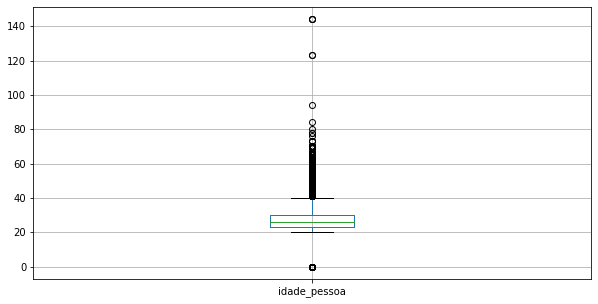

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
dados.boxplot(column = ['idade_pessoa'])

**OBS: Eu optei por não remover alguns dados que estão após o limite superior e abaixo ao limite inferior do boxplot, visando um modelo mais abrangente**

Pelo BoxPlot é possível notar uma grande quantidade de pessoas com idade = 0 e acima dos 85 anos já parecem estar muito longe dos dados comuns que temos. Visto isso, iremos tratar para não afetar nosso modelo

In [7]:
dados_idade_out = dados.loc[dados.idade_pessoa > 18]
dados_idade_out2 = dados_idade_out.loc[dados_idade_out.idade_pessoa < 85]

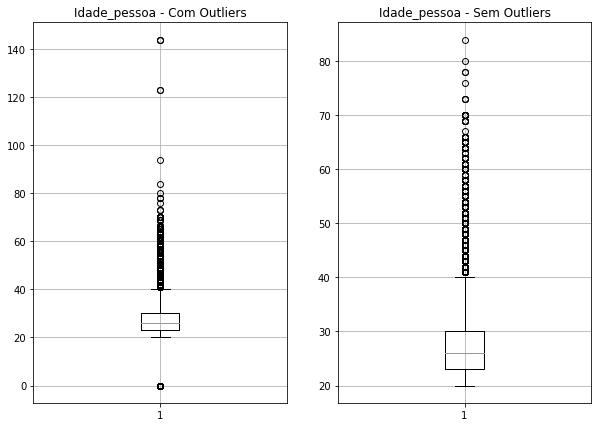

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].boxplot(dados.idade_pessoa)
ax[0].set_title('Idade_pessoa - Com Outliers')
ax[0].grid(True)
ax[1].boxplot(dados_idade_out2.idade_pessoa)
ax[1].set_title('Idade_pessoa - Sem Outliers')
ax[1].grid(True)

Agora ja temos uma melhora na dispersão de dados comparado com anteriormente

In [9]:
dados_idade_out2.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,33146.000000,3.314600e+04,33146.000000,33146.000000,33146.000000,33146.000000,33146.000000,33146.000000
mean,27.716376,6.554003e+04,4.632746,9535.114343,9.902509,0.216678,0.169280,5.801092
std,6.201413,5.253935e+04,4.158681,6343.415706,4.516430,0.411987,0.107184,4.048721
min,20.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:>

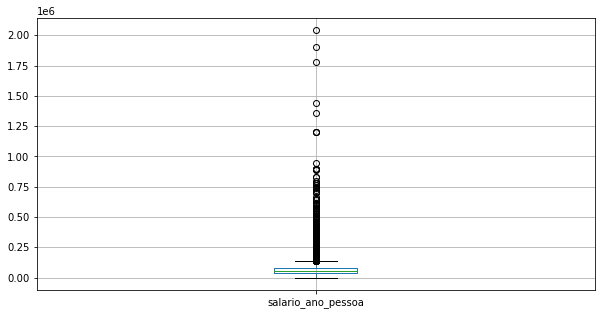

In [10]:
plt.figure(figsize=(10,5))
dados_idade_out2.boxplot(column = ['salario_ano_pessoa'])

Pode ser visto que acima de poucas pessoas posuem o salario acima dos 1 milhão anuais e pessoas que não ganham nenhum salário anual parece não fazer sentido para o que queremos. Iremos tratar isso:

In [11]:
dados_salario_ano = dados_idade_out2.loc[dados_idade_out2.salario_ano_pessoa < 1000000]
dados_salario_ano2 = dados_salario_ano.loc[dados_salario_ano.salario_ano_pessoa > 0]

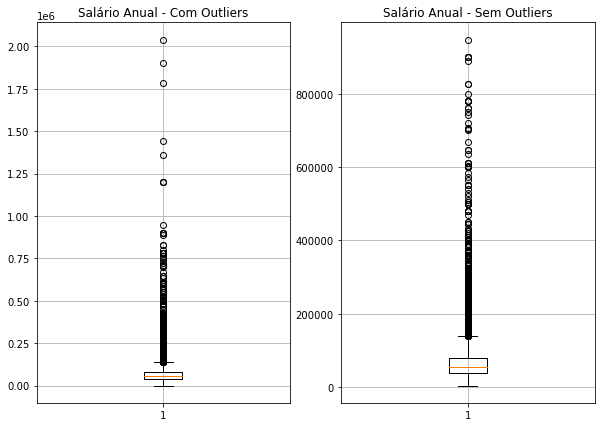

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].boxplot(dados_idade_out2.salario_ano_pessoa)
ax[0].set_title('Salário Anual - Com Outliers')
ax[0].grid(True)
ax[1].boxplot(dados_salario_ano2.salario_ano_pessoa)
ax[1].set_title('Salário Anual - Sem Outliers')
ax[1].grid(True)

Veja que mesmo removendo os outliers claros ainda sim a variável dos salários anuais continua dispersa, porém vou optar por não exluir esses dados.

In [13]:
dados_salario_ano2.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,32973.000000,32973.000000,32973.000000,32973.000000,32973.000000,32973.000000,32973.000000,32973.000000
mean,27.713281,65516.216268,4.635763,9544.211173,9.912245,0.217147,0.169393,5.798441
std,6.192305,47099.566872,4.158444,6340.027808,4.507023,0.412310,0.107037,4.046236
min,20.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,84.000000,948000.000000,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:>

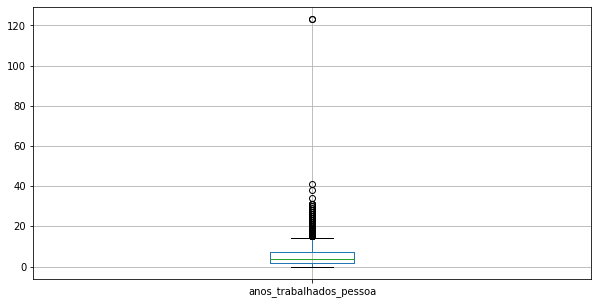

In [14]:
plt.figure(figsize=(10,5))
dados_salario_ano2.boxplot(column = ['anos_trabalhados_pessoa'])

Vemos que temos um dado acima de 120 anos de trabalho, o que é impossível. Iremos remover esse dado.

In [15]:
dados_anos_trabalhados = dados_salario_ano2.loc[dados_salario_ano2.anos_trabalhados_pessoa < 100]

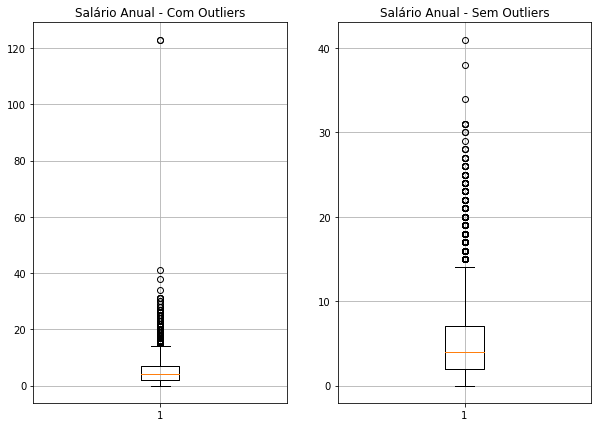

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].boxplot(dados_salario_ano2.anos_trabalhados_pessoa)
ax[0].set_title('Salário Anual - Com Outliers')
ax[0].grid(True)
ax[1].boxplot(dados_anos_trabalhados.anos_trabalhados_pessoa)
ax[1].set_title('Salário Anual - Sem Outliers')
ax[1].grid(True)

Ao contrario da variável anterior, essa se mostrou bem eficiente ao remover um dos outliers

In [17]:
dados.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,33360.000000,3.336000e+04,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000
mean,27.561721,6.564681e+04,4.628567,9529.754197,9.893280,0.216457,0.169135,5.807374
std,6.698419,6.174520e+04,4.159946,6348.596166,4.523957,0.411835,0.107204,4.057953
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.827100e+04,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


O valor do emprestimo não pode ser igual a zero, logo iremos eliminar esses registros. Da mesma maneira a taxa de juros ser zero se tratando de um emprestimo parece ser também um outlier. Vamos tratar essas duas colunas

In [18]:
dados_valor_emprestimo = dados_anos_trabalhados.loc[dados_anos_trabalhados.valor_emprestimo > 0]
dados_taxa_juros = dados_valor_emprestimo.loc[dados_valor_emprestimo.taxa_juros_emprestimo > 0]

In [19]:
dados = dados_taxa_juros

Vamos analisar como ficou nossa base de dados depois de tratar esses outliers:

In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29583 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_pessoa                      29583 non-null  object 
 1   idade_pessoa                   29583 non-null  int64  
 2   salario_ano_pessoa             29583 non-null  int64  
 3   propriedade_pessoa             29583 non-null  object 
 4   anos_trabalhados_pessoa        29583 non-null  float64
 5   id_emprestimo                  29583 non-null  object 
 6   motivo_emprestimo              29583 non-null  object 
 7   pontuacao_emprestimo           29583 non-null  object 
 8   valor_emprestimo               29583 non-null  int64  
 9   taxa_juros_emprestimo          29583 non-null  float64
 10  status_inadimplencia           29583 non-null  int64  
 11  percentual_emprestimo_salario  29583 non-null  float64
 12  id_historico                   29583 non-null 

In [21]:
dados.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,29583.000000,29583.000000,29583.000000,29583.000000,29583.000000,29583.000000,29583.000000,29583.000000
mean,27.699997,65525.552987,4.633911,9583.453335,11.010195,0.218808,0.169739,5.786938
std,6.168867,46921.136552,4.056791,6317.036143,3.239640,0.413445,0.107013,4.026903
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79000.000000,7.000000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,84.000000,948000.000000,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


No final das contas, perdemos alguns registros da nossa base de dados, porém elas afetariam diretamente no nosso modelo, ou seja, remover esses outliers irá trazer mais vantagens do que desvantagens.

### 3. Correlação de Variáveis

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(dados.corr(), annot = True)

<AxesSubplot:>

Analise das correlações pelo mapa de calor:

• O **valor do emprestimo** parece ter correlação com **salario anual da pessoa**

• A **taxa de juros do emprestimo** parece ter correlação com o **status de inadimplência**

• O **percentual entre o emprestimo e o salario** parece ter uma correlação ainda mais forte com o **status de inadimplência**